# Tensors

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators.


In [4]:
import torch
import numpy as np

#q: what is torch?
#a: torch is a library for tensor computation and deep learning

## Initializing a Tensor

In [5]:
# Directly from data
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [6]:
# From a NumPy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [8]:
# from another tensor
# new tensor retains the properties (shape, datatype) of the argument tensor, 
# unless explicitly overridden.

x_ones = torch.ones_like(x_data) # retains the properties of x_data
x_ones

tensor([[1, 1],
        [1, 1]])

In [9]:
x_rand =torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
x_rand

tensor([[0.1968, 0.1757],
        [0.4454, 0.7314]])

In [12]:
# With random or constant values:
shape = (2,3,)
# q: why add a comma after 3?
# a: to make it a tuple, otherwise it's just a number

rand_tensor = torch.rand(shape)
rand_tensor


tensor([[0.6836, 0.3092, 0.3358],
        [0.7930, 0.4491, 0.0244]])

## Attributes of a tensor

In [13]:
# create a random tensor of sixe (3,4)
tensor = torch.rand(3,4)
tensor

tensor([[0.8844, 0.7167, 0.6753, 0.7148],
        [0.2875, 0.1797, 0.3001, 0.0503],
        [0.5373, 0.7141, 0.9634, 0.4145]])

In [14]:
tensor.shape

torch.Size([3, 4])

In [15]:
tensor.dtype

torch.float32

In [16]:
tensor.device

device(type='cpu')

## Operations on Tensors

# Datasets & DataLoaders

Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

In [6]:
# Load the FashionMNIST Dataset
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

# q: what does transform = ToTensor() do?
# a: it converts the PIL image to a tensor

## Iterating and Visualizing the Dataset

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


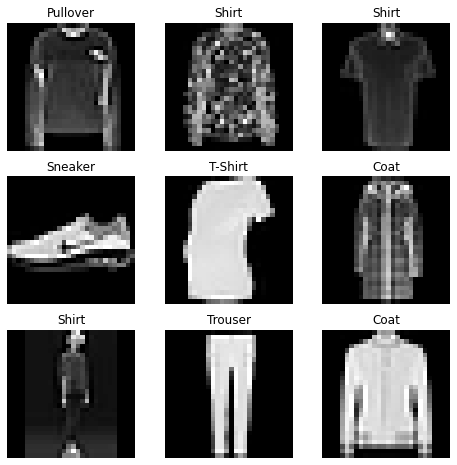

In [9]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    print(img.shape)
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    #q: what does squeeze do?
    #a: it removes the extra dimension
    #q: what extra dimension?
    #a: the extra dimension is the channel dimension, 
    # which is 1 for grayscale images
plt.show()

## Creating a custom Dataset for your files

A custom Dataset class must implement three functions: __init__, __len__, and __getitem__. 

In [ ]:
import os
import pandas as pd
import torchvision.io as read_image

# this class extends Dataset class in pytorch
class CustomImageDataset(Dataset):
    def __init__(self,annotations_file,img_dir,transform=None,target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    #q: what does transform and target_transform do?
    #a: transform is applied to the input image
    # target_transform is applied to the input label

    # implement __len__ so that len(dataset) returns the size of the dataset
    def __len__(self):
        return len(self.img_labels)
    
    # implement __getitem__ 
    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
        image = read_image(img_path)

        label = self.img_labels.iloc[idx,1]
        #q: what does iloc do?
        #a: it returns the value at the given index

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image,label

## Preparing your data for training with dataloaders

The Dataset retrieves our dataset’s features and labels one sample at a time. 
While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=64,shuffle=True)

## Iterate through the DataLoader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


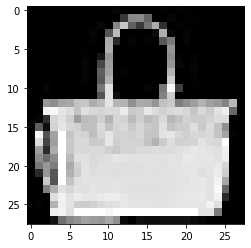

Label: 8


In [10]:
# Display an image and label
train_batch, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_batch.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_batch[0].squeeze()
label = train_labels[0]

# display the image and the label
plt.imshow(img,cmap="gray")
plt.show()
print(f"Label: {label}")

# Transforms

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use ToTensor and Lambda.

In [11]:
from torchvision.transforms import ToTensor, Lambda

# q: what does Lambda do?
# a: it applies a user-defined lambda as a transform

ds = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0,torch.tensor(y),value=1))
)

# q: explain target_transform line
# a: it creates a one-hot vector of size 10, and sets the value at index y to 1

# Build the Network

# Automatic Differentiation with torch.autograd

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.


In [12]:
# consider the simplest one layer NN

x = torch.ones(5) # input tensor
y = torch.zeros(3) # expected output

# we need to be able to compute the gradients of loss function with respect to those variables
w = torch.randn(5,3,requires_grad=True)
b = torch.randn(3,requires_grad=True)

z = torch.matmul(x,w)+b

loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

 A reference to the backward propagation function is stored in grad_fn property of a tensor. 

In [18]:
print(w.grad_fn)

None


In [13]:
z.grad_fn
#q: what does grad_fn do?
# a: it references a function that has created the Tensor

In [14]:
loss.grad_fn

## computing gradients

In [15]:
loss.backward()
#q: what does backward do?
# a: it computes the gradient of loss with respect to all tensors with requires_grad=True

print(w.grad)
print(b.grad)

tensor([[0.2045, 0.0356, 0.3252],
        [0.2045, 0.0356, 0.3252],
        [0.2045, 0.0356, 0.3252],
        [0.2045, 0.0356, 0.3252],
        [0.2045, 0.0356, 0.3252]])
tensor([0.2045, 0.0356, 0.3252])


## Disabling gradient tracking

there are some cases when we do not need to do that, for example, when we have trained the model and just want to apply it to some input data, i.e. we only want to do forward computations through the network. We can stop tracking computations by surrounding our computation code with torch.no_grad() block:

In [16]:
z = torch.matmul(x,w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x,w)+b
print(z.requires_grad)

True
False
